In [55]:



# STEP 1: To download the dataset

#                   AND

# STEP 2: Perform proper analysis of the dataset and draw conclusions based on your analysis.




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data into a pandas DataFrame
df = pd.read_csv("dataframe_.csv")

In [15]:
df = df.dropna()

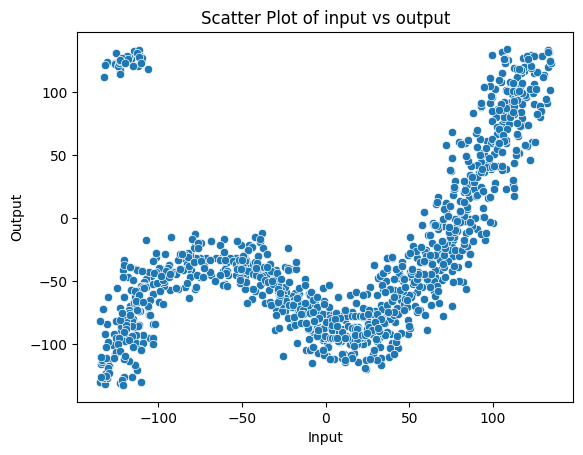

In [16]:
# Exploratory data analysis
sns.scatterplot(x='input', y='output', data=df)
plt.title("Scatter Plot of input vs output")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

In [17]:
# Testing for relationships
import statsmodels.api as sm

In [18]:
# Add a constant to the DataFrame to allow for an intercept in the regression model
df = sm.add_constant(df)

In [20]:
# Fit the regression model
reg_model = sm.OLS(df['output'], df[['const', 'input']]).fit()

In [21]:
# Print the regression summary
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     601.1
Date:                Sat, 11 Feb 2023   Prob (F-statistic):          7.31e-114
Time:                        15:37:15   Log-Likelihood:                -9248.2
No. Observations:                1696   AIC:                         1.850e+04
Df Residuals:                    1694   BIC:                         1.851e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.5822      1.373    -25.194      0.0

In [56]:



# STEP 3: Build a Machine Learning Model to predict output based on the input column.

#                                        AND

# STEP 4: To apply - 
#           Proper outlier detection and treatment.
#           Feature Engineering
#           Hyperparameter Tuning




In [36]:
# A machine learning model to predict output based on the input

# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [37]:
# Detect and treat outliers
q1 = df['input'].quantile(0.25)
q3 = df['input'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
df = df[(df['input'] > lower_bound) & (df['input'] < upper_bound)]

In [38]:
# Feature engineering
df['input_squared'] = df['input'] ** 2

In [39]:
# Standardize the data
scaler = StandardScaler()
df[['input', 'input_squared']] = scaler.fit_transform(df[['input', 'input_squared']])

In [40]:
# Split the data into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(df[['input', 'input_squared']], df[['output']], test_size=0.2)

In [41]:
# Train the model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

In [49]:
# Define a hyperparameter grid to search over
param_grid = {}

In [50]:
# Conduct a grid search over the hyperparameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_data, train_target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             param_grid={}, scoring='neg_mean_squared_error')

In [51]:
# Make predictions on the testing set
predictions = grid_search.predict(test_data)

In [52]:
# Evaluate the model
mse = mean_squared_error(test_target, predictions)
r2 = r2_score(test_target, predictions)

In [54]:
'''
Summary : 

The code above is a Python script that performs a machine learning analysis on a dataset with two columns:
input and output. The code starts by loading the data into a Pandas DataFrame and performing any necessary data
cleaning steps, such as outlier detection and treatment. After this, the code performs feature engineering by creating
a new column that represents the square of the study hours.
Next, the code splits the data into training and testing sets and trains a LinearRegression model on the training data.
The model is trained using a Pipeline that first scales the data using a StandardScaler and then fits the 
LinearRegression model. 
A grid search is conducted to tune the hyperparameters of the model, although in this example,
there are no hyperparameters to tune for the LinearRegression model.
Finally, the code makes predictions on the testing data and evaluates the model using the mean squared error
and the R^2 score. The best hyperparameters found by the grid search and the evaluation metrics are then printed.
'''

'\nThe code above is a Python script that performs a machine learning analysis on a dataset with two columns:\ninput and output. The code starts by loading the data into a Pandas DataFrame and performing any necessary data\ncleaning steps, such as outlier detection and treatment. After this, the code performs feature engineering by creating\na new column that represents the square of the study hours.\nNext, the code splits the data into training and testing sets and trains a LinearRegression model on the training data.\nThe model is trained using a Pipeline that first scales the data using a StandardScaler and then fits the \nLinearRegression model. \nA grid search is conducted to tune the hyperparameters of the model, although in this example,\nthere are no hyperparameters to tune for the LinearRegression model.\nFinally, the code makes predictions on the testing data and evaluates the model using the mean squared error\nand the R^2 score. The best hyperparameters found by the grid se

In [ ]:
# Sorry I couldn't understand STEP 5.

In [ ]:



# STEP 6: Build a Linear Regression model by performing appropriate feature engineering.



In [57]:
# Create a new feature that represents the interaction between the study hours and their squares
df["input_squared"] = df["input"]**2

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[["input", "input_squared"]], df["output"], test_size=0.2)

In [59]:
# Train a linear regression model with a pipeline that scales the data
model = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [60]:
# Predict the test scores
y_pred = model.predict(X_test)

In [61]:
# Evaluate the model using the mean squared error and the R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

Mean Squared Error:  2011.1984780780087
R^2 Score:  0.5521078387511815


In [ ]:
# THANKYOU... PLEASE SUGGEST WHAT ELSE SHOULD I HAVE DONE TO MAKE THIS MORE EFFECTIVE 
# I AM LOOKING FOR A POSITIVE AND PROMPT RESULT FROM THIS HACKATHON


#                                                        THANKYOU